# Let’s analyze some data!: Lab4

In [1]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab4.ipynb
# Author      : Dilan Castañeda                                             
# Created On  : September 24, 2024                                           
# Last Update : September 24, 2024                                         
# Version     : 1.0.0                                          
# Description :       
# ─────────────────────────────────────────────────────────────────────────────

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests

## 1) We’ll be working with measurements of body dimensions. Load the dataset ”body_dimensions.csv”. 
A description of the data can be found here: https://www.openintro.org/book/statdata/?data=bdims

In [6]:
# Download the dataset
# url = 'https://www.openintro.org/book/statdata/bdims.csv'
path = r'C:\Users\dilan\Documents\Github\DataAnalysis_and_AI\period_2\Resources\Datasets\bdims.csv'

# Load the dataset
df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bia.di  507 non-null    float64
 1   bii.di  507 non-null    float64
 2   bit.di  507 non-null    float64
 3   che.de  507 non-null    float64
 4   che.di  507 non-null    float64
 5   elb.di  507 non-null    float64
 6   wri.di  507 non-null    float64
 7   kne.di  507 non-null    float64
 8   ank.di  507 non-null    float64
 9   sho.gi  507 non-null    float64
 10  che.gi  507 non-null    float64
 11  wai.gi  507 non-null    float64
 12  nav.gi  507 non-null    float64
 13  hip.gi  507 non-null    float64
 14  thi.gi  507 non-null    float64
 15  bic.gi  507 non-null    float64
 16  for.gi  507 non-null    float64
 17  kne.gi  507 non-null    float64
 18  cal.gi  507 non-null    float64
 19  ank.gi  507 non-null    float64
 20  wri.gi  507 non-null    float64
 21  age     507 non-null    int64  
 22  wg

## 2) It is thought that men and women tend to have different body dimensions. 
Make a histogram of men’s heights and a histogram of women’s height. Describe and compare the distributions. Use central tendency, dispersion, skewness, and kurtosis metrics

In [21]:
# Comparative os men and women heights distribution using central tendency, dispersion, skewness, and kurtosis metrics
descriptive_stats = df.groupby('sex')['hgt'].describe() # 0: women, 1: men

# Calculate skewness and kurtosis for each group
skewness = df.groupby('sex')['hgt'].skew()
kurtosis = df.groupby('sex')['hgt'].apply(pd.Series.kurtosis)

# Combine all metrics into a single DataFrame
comparative_stats = descriptive_stats.copy()
comparative_stats['skewness'] = skewness
comparative_stats['kurtosis'] = kurtosis

# Display the results
comparative_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
sex,,,,,,,,,,
0,260.0,164.872308,6.544602,147.2,160.0,164.5,169.50,182.9,0.066121,-0.281127
1,247.0,177.745344,7.183629,157.2,172.9,177.8,182.65,198.1,0.104163,-0.114278


## 3) Plot a normal distribution curve on top of each histogram to see how closely they follow a normal distribution. Hint: The
reference normal distribution show have the same mean and standard deviation as the dataset. Do the men and women
heights seem normally distributed?

Yes, they seem normally distributed but with different mean and std

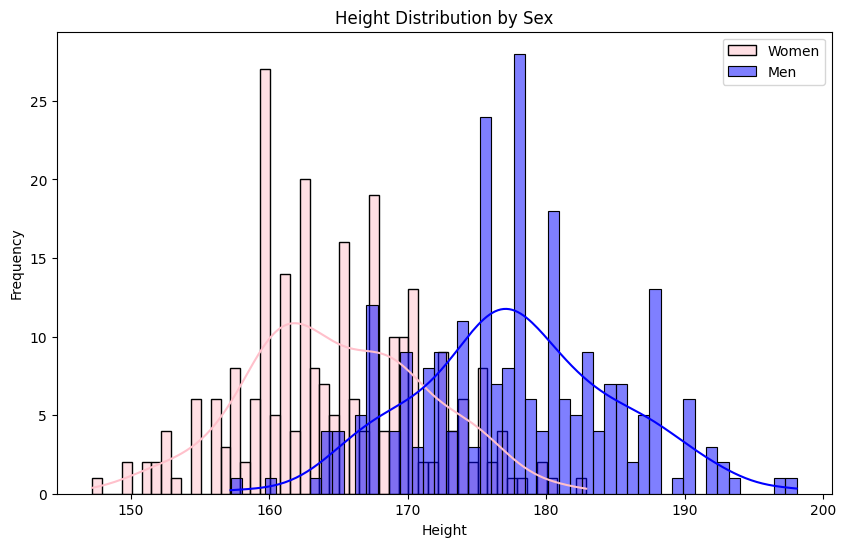

In [22]:
# Plot histograms for both groups on the same plot using seaborn
plt.figure(figsize=(10, 6))

# Histogram for women (sex = 0)
sns.histplot(df[df['sex'] == 0]['hgt'], bins=50, color='pink', label='Women', kde=True, alpha=0.5)

# Histogram for men (sex = 1)
sns.histplot(df[df['sex'] == 1]['hgt'], bins=50, color='blue', label='Men', kde=True, alpha=0.5)

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Distribution by Sex')
plt.legend()

# Show plot
plt.show()

## 4) A visual assessment of data normality is through a Q-Q plot. 
Build a Q-Q plot for each dataset using “probplot” from scipy.stats. A data set that is nearly normal will result in a probability plot where the points closely follow the line. Draw a Q-Q plot using random numbers generated from a normal distribution to see how normal data look like.


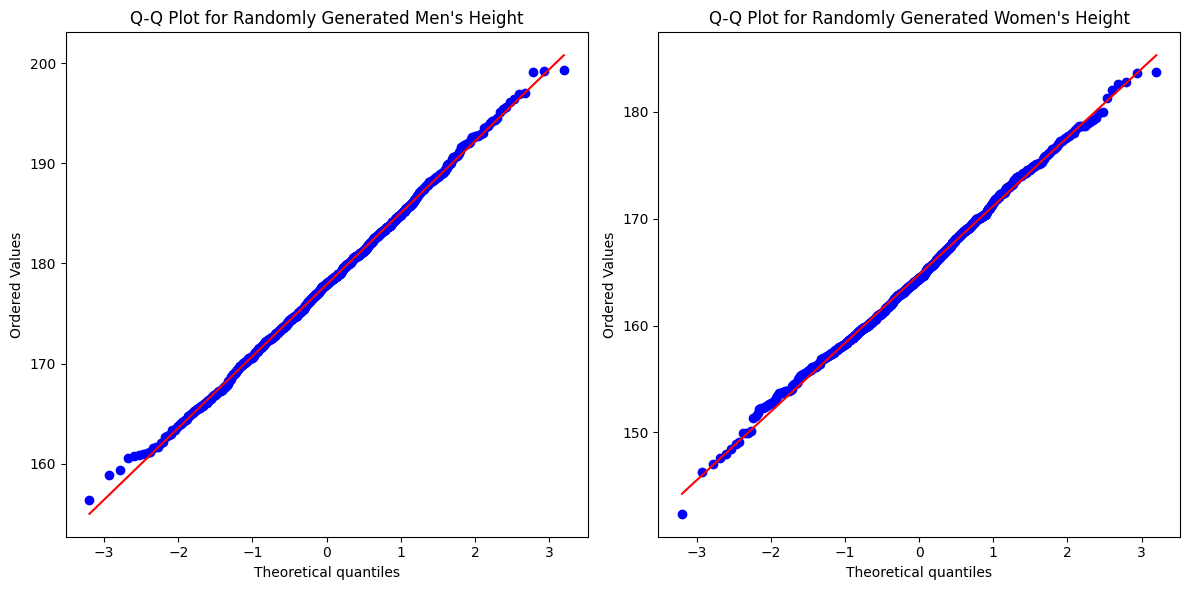

In [26]:
# Statistics from the comparative analysis
mean_men = comparative_stats.loc[1, 'mean']
std_men = comparative_stats.loc[1, 'std']
n_men = 1000

mean_women = comparative_stats.loc[0, 'mean']
std_women = comparative_stats.loc[0, 'std']
n_women = 1000

# Generate random normal data based on the statistics
random_men_hgt = np.random.normal(loc=mean_men, scale=std_men, size=n_men)
random_women_hgt = np.random.normal(loc=mean_women, scale=std_women, size=n_women)

# Create Q-Q plots for the generated random data
plt.figure(figsize=(12, 6))

# Q-Q plot for men's random height
plt.subplot(1, 2, 1)
stats.probplot(random_men_hgt, dist="norm", plot=plt)
plt.title('Q-Q Plot for Randomly Generated Men\'s Height')

# Q-Q plot for women's random height
plt.subplot(1, 2, 2)
stats.probplot(random_women_hgt, dist="norm", plot=plt)
plt.title('Q-Q Plot for Randomly Generated Women\'s Height')

plt.tight_layout()
plt.show()